In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#top 5 zipcodes for 911 calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
#top 5 townships (twp) for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
#number of unique title codes
df['title'].nunique()

110

In [9]:
df['reason']=df['title'].apply(lambda x: x.split(':')[0])

In [10]:
#most common Reason for a 911 call
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

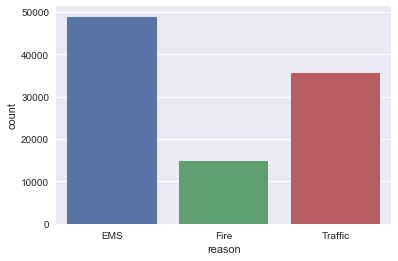

In [11]:
sns.countplot(x=df['reason'])

In [12]:
type(df['timeStamp'][1])

str

In [13]:
df['timeStamp']=df['timeStamp'].apply(lambda x: pd.to_datetime(x))


In [14]:
df['hour']=df['timeStamp'].apply(lambda x:x.hour )
df['month']=df['timeStamp'].apply(lambda x:x.month )
df['dow']=df['timeStamp'].apply(lambda x:x.dayofweek )

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['dow']=df['dow'].apply(lambda x:dmap[x] )

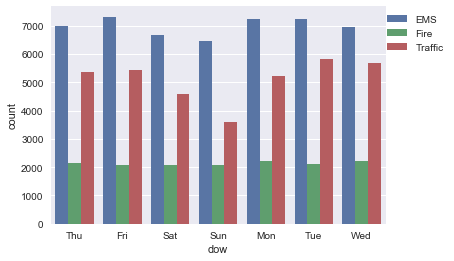

In [48]:
sns.countplot(x=df['dow'],hue=df['reason'])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

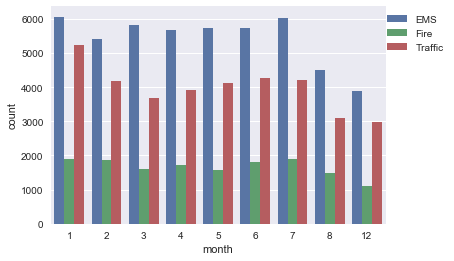

In [49]:
sns.countplot(x=df['month'],hue=df['reason'])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

In [52]:
byMonth=df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dow
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


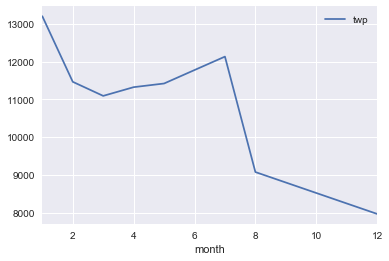

In [57]:
byMonth.plot.line(x=byMonth.index,y='twp')

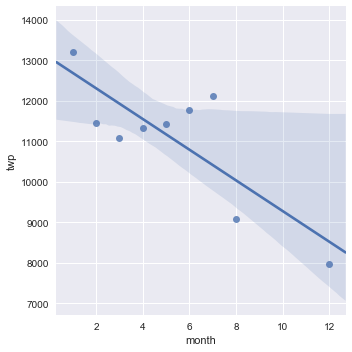

In [59]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [60]:
df['date']=df['timeStamp'].apply(lambda x:x.date())

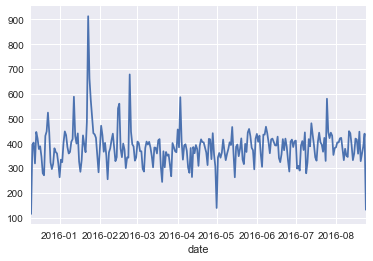

In [61]:
df.groupby('date').count().twp.plot()

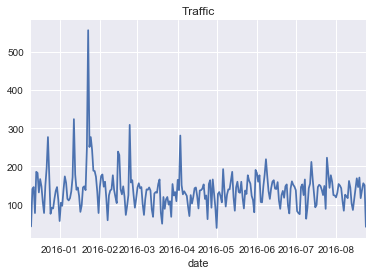

In [62]:
df[df['reason']=='Traffic'].groupby('date').count().twp.plot()
plt.title('Traffic')

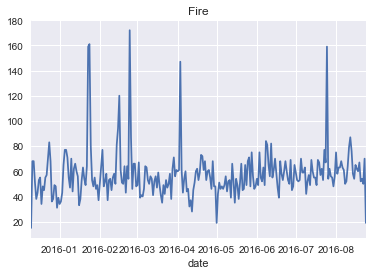

In [63]:
df[df['reason']=='Fire'].groupby('date').count().twp.plot()
plt.title('Fire')

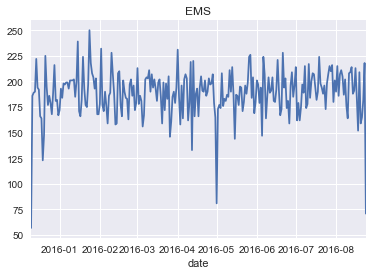

In [64]:
df[df['reason']=='EMS'].groupby('date').count().twp.plot()
plt.title('EMS')

In [66]:
df1=df.groupby(by=['dow','hour']).count()['reason'].unstack()
df1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


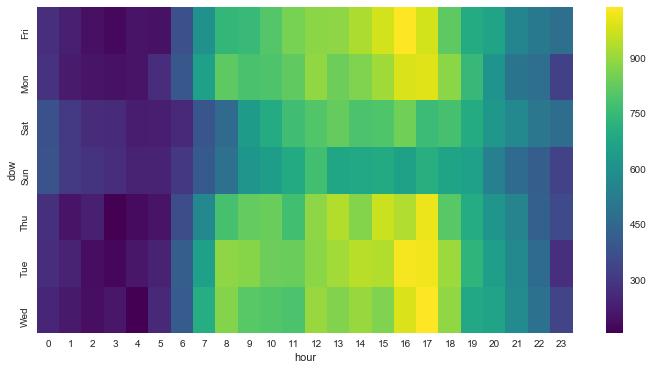

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis')

C:\Users\Disha\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


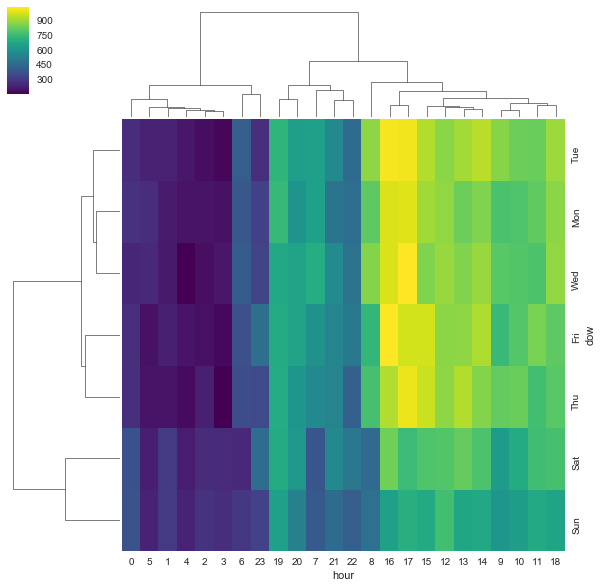

In [74]:
sns.clustermap(df1,cmap='viridis')

In [75]:
df1=df.groupby(by=['dow','month']).count()['reason'].unstack()
df1.head()

month,1,2,3,4,5,6,7,8,12
dow,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


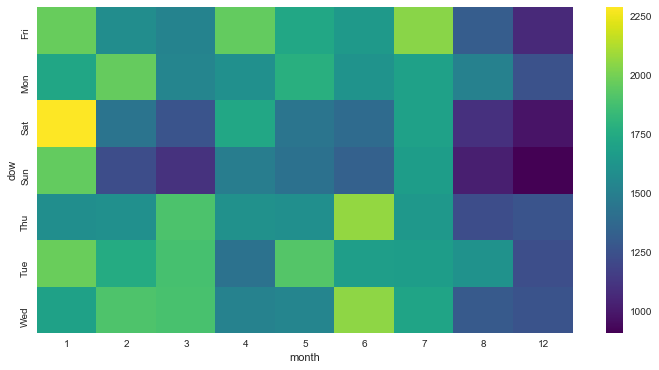

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis')

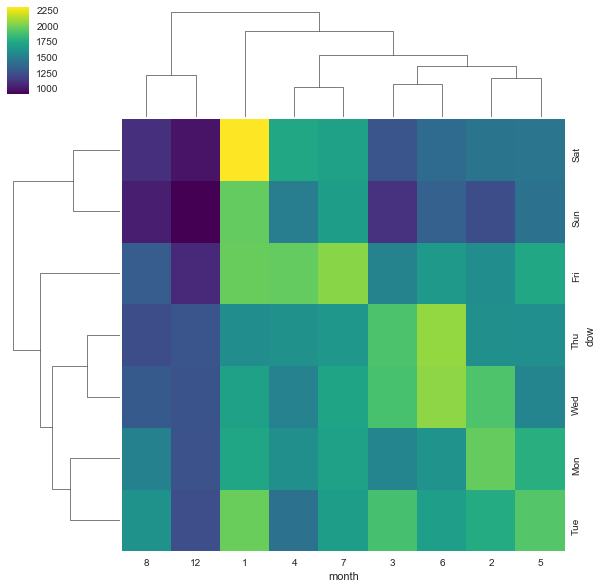

In [77]:
sns.clustermap(df1,cmap='viridis')